In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
startups = pd.read_csv('50_startups.csv')
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
startups = startups.rename({'R&D Spend':'Spend', 'Marketing Spend':'Marketing'},axis=1)
startups.head()

,Spend,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
#preparing a model
model = smf.ols('Profit~Spend+Administration+Marketing+State',data=startups).fit()

In [6]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 16 May 2023   Prob (F-statistic):           1.34e-27
Time:                        12:54:27   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State[T.Florida]    198.7888   3371.007      0.059      0.953   -6595.030    6992.607
State[T.New York]   -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
Spend                 0.8060      0.046     17.369      0.000       0.712       0.900
Administration       -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
model.params

Intercept            50125.343832
State[T.Florida]       198.788793
State[T.New York]      -41.887019
Spend                    0.806023
Administration          -0.027004
Marketing                0.026980
dtype: float64

In [8]:
print(model.tvalues, '\n', model.pvalues)

Intercept             7.280560
State[T.Florida]      0.058970
State[T.New York]    -0.012864
Spend                17.368580
Administration       -0.517012
Marketing             1.573889
dtype: float64 
 Intercept            4.444178e-09
State[T.Florida]     9.532429e-01
State[T.New York]    9.897941e-01
Spend                2.578772e-21
Administration       6.077373e-01
Marketing            1.226769e-01
dtype: float64


In [9]:
(model.rsquared,model.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

In [10]:
#coreelation matrix
startups.corr()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13800\2518167401.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  startups.corr()


,Spend,Administration,Marketing,Profit
Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


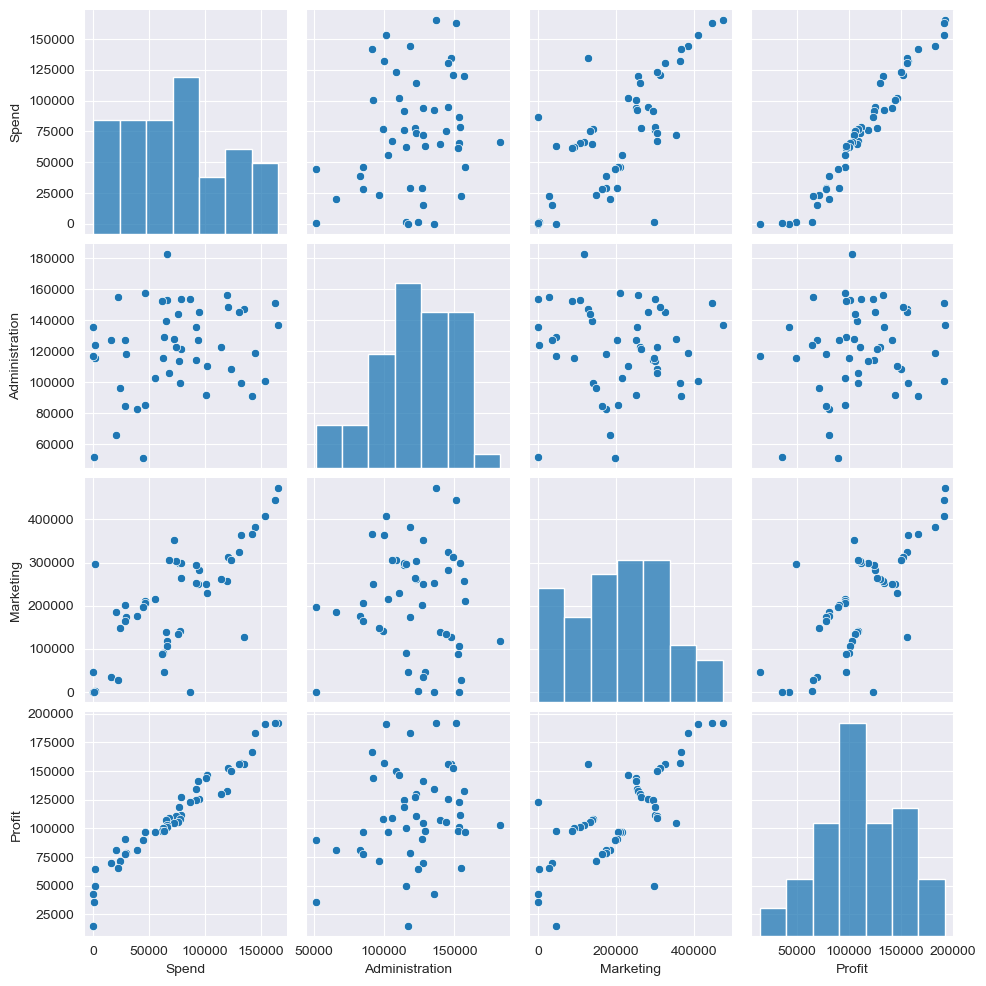

In [11]:
sns.set_style(style='darkgrid')
sns.pairplot(startups)

In [12]:
slr_sp = smf.ols('Profit~Spend',data=startups).fit()
slr_sp.tvalues, '\n', slr_sp.pvalues

(Intercept    19.320288
 Spend        29.151139
 dtype: float64,
 '\n',
 Intercept    2.782697e-24
 Spend        3.500322e-32
 dtype: float64)

In [13]:
slr_adm = smf.ols('Profit~Administration',data=startups).fit()
slr_adm.tvalues, '\n', slr_adm.pvalues

(Intercept         3.040044
 Administration    1.419493
 dtype: float64,
 '\n',
 Intercept         0.003824
 Administration    0.162217
 dtype: float64)

In [14]:
slr_mrk = smf.ols('Profit~Marketing',data=startups).fit()
slr_mrk.tvalues, '\n', slr_mrk.pvalues

(Intercept    7.808356
 Marketing    7.802657
 dtype: float64,
 '\n',
 Intercept    4.294735e-10
 Marketing    4.381073e-10
 dtype: float64)

In [15]:
slr_st = smf.ols('Profit~State',data=startups).fit()
slr_st.tvalues, '\n', slr_st.pvalues

(Intercept            10.536302
 State[T.Florida]      1.049860
 State[T.New York]     0.706364
 dtype: float64,
 '\n',
 Intercept            5.774813e-14
 State[T.Florida]     2.991510e-01
 State[T.New York]    4.834492e-01
 dtype: float64)

In [16]:
#calculating vif

In [29]:
rsq_profit = smf.ols('Profit~Spend+Administration+Marketing+State', data=startups).fit().rsquared
vif_profit = 1/(1-rsq_profit)

rsq_spend = smf.ols('Spend~Administration+Marketing+State+Profit', data=startups).fit().rsquared
vif_spend = 1/(1-rsq_spend)

rsq_administration = smf.ols('Administration~Marketing+State+Profit+Spend', data=startups).fit().rsquared
vif_administration = 1/(1-rsq_administration)

rsq_marketing = smf.ols('Marketing~State+Profit+Spend+Administration', data=startups).fit().rsquared
vif_marketing = 1/(1-rsq_marketing)


d1 = {'Variables':['Profit','Spend','Administration','Marketing'],
     'VIF':[vif_profit,vif_spend,vif_administration,vif_marketing,]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,Profit,20.305593
1,Spend,19.604937
2,Administration,1.184921
3,Marketing,2.552858


In [18]:
import statsmodels.api as sm

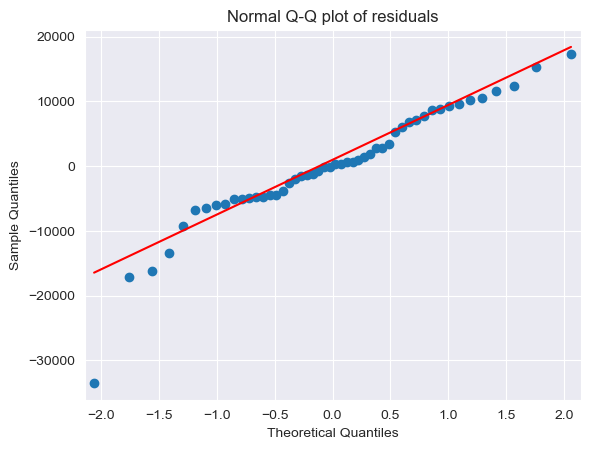

In [19]:
model = smf.ols('Profit~Spend+Administration+Marketing+State',data=startups).fit()
qqplot = sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [20]:
list(np.where(model.resid<-3000))

[array([ 4,  5,  7,  9, 14, 15, 17, 18, 21, 22, 24, 26, 27, 46, 47, 48, 49],
       dtype=int64)]

In [21]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

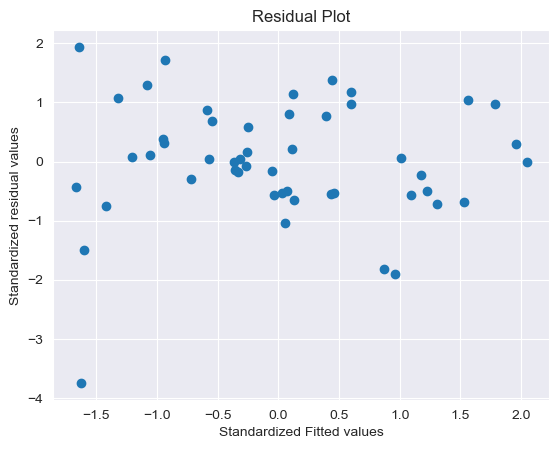

In [23]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

eval_env: 1


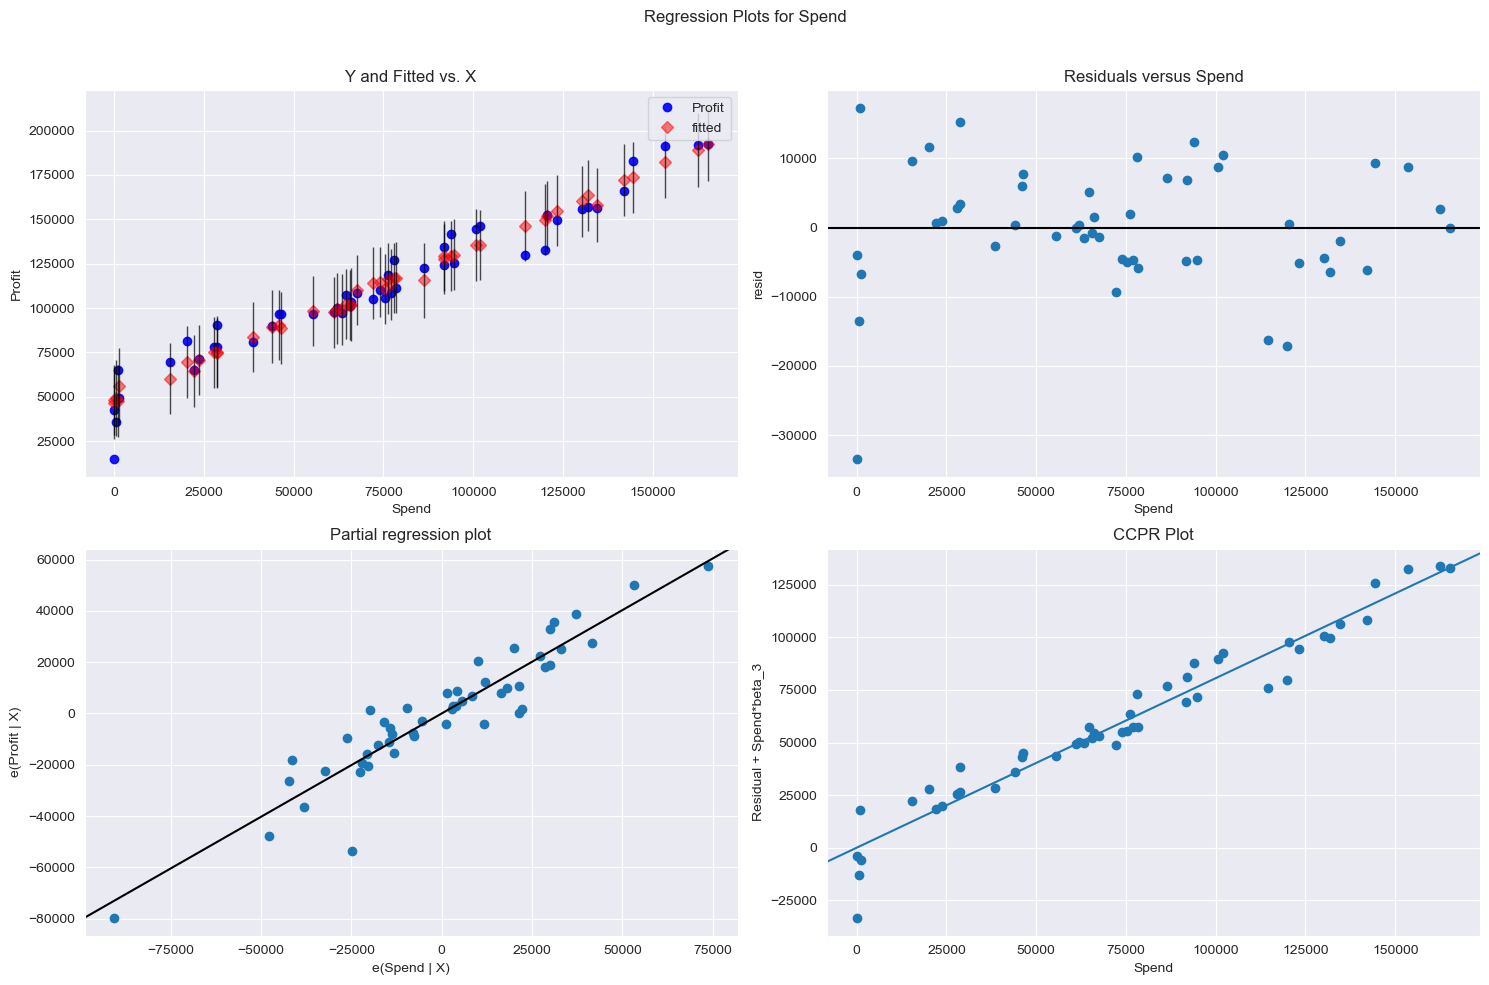

In [24]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, 'Spend', fig=fig)
plt.show()

eval_env: 1


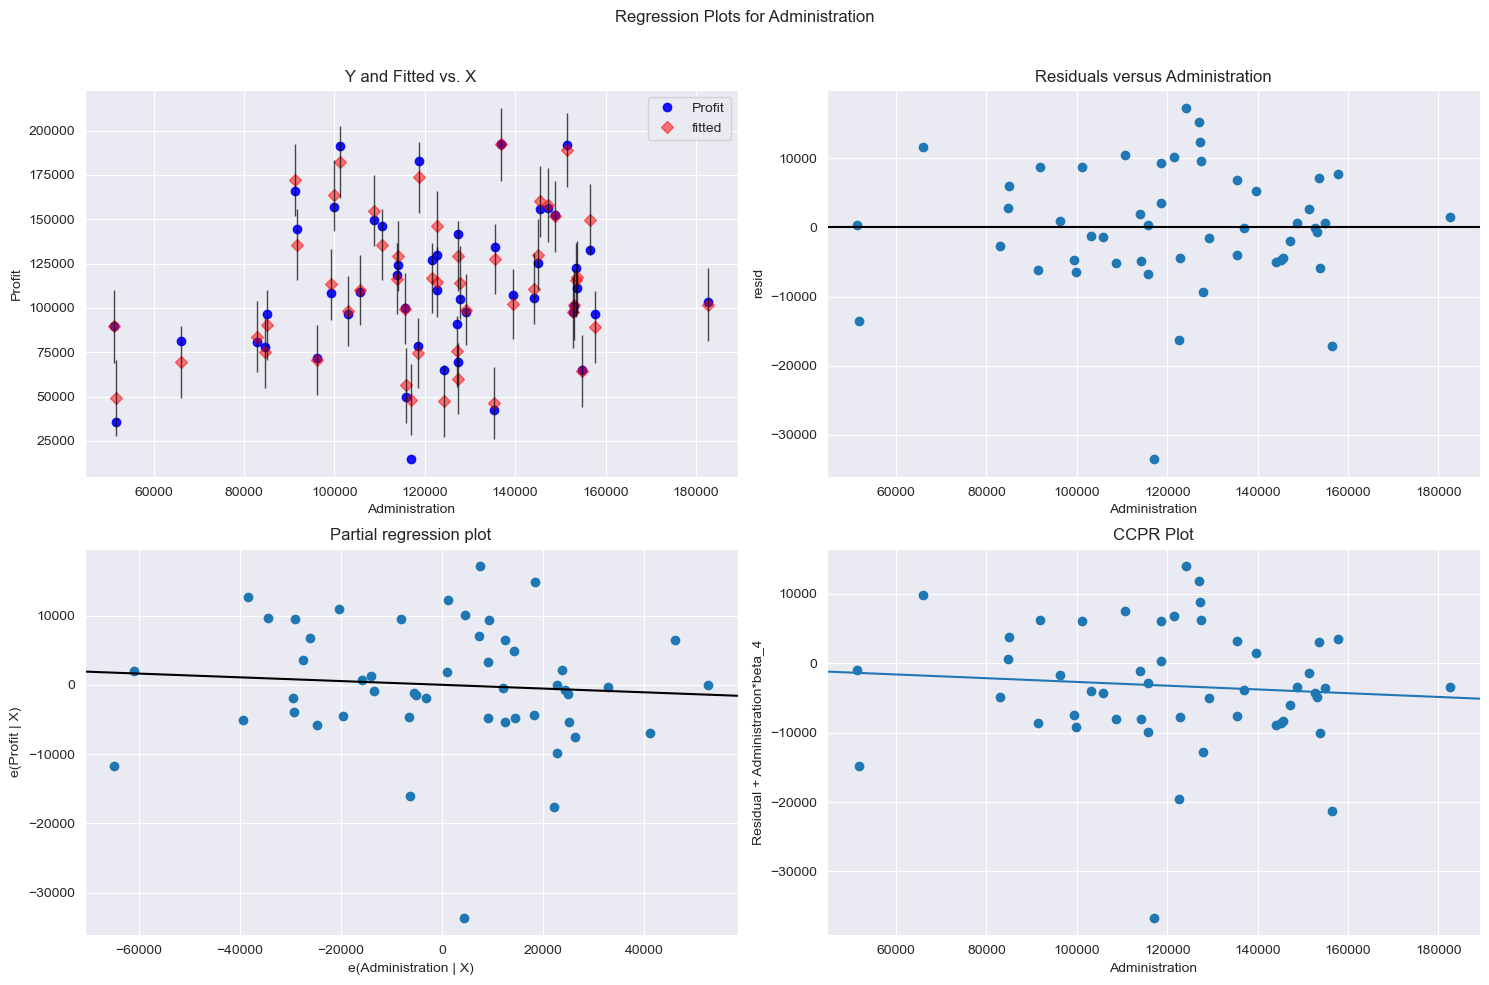

In [25]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, 'Administration', fig=fig)
plt.show()

eval_env: 1


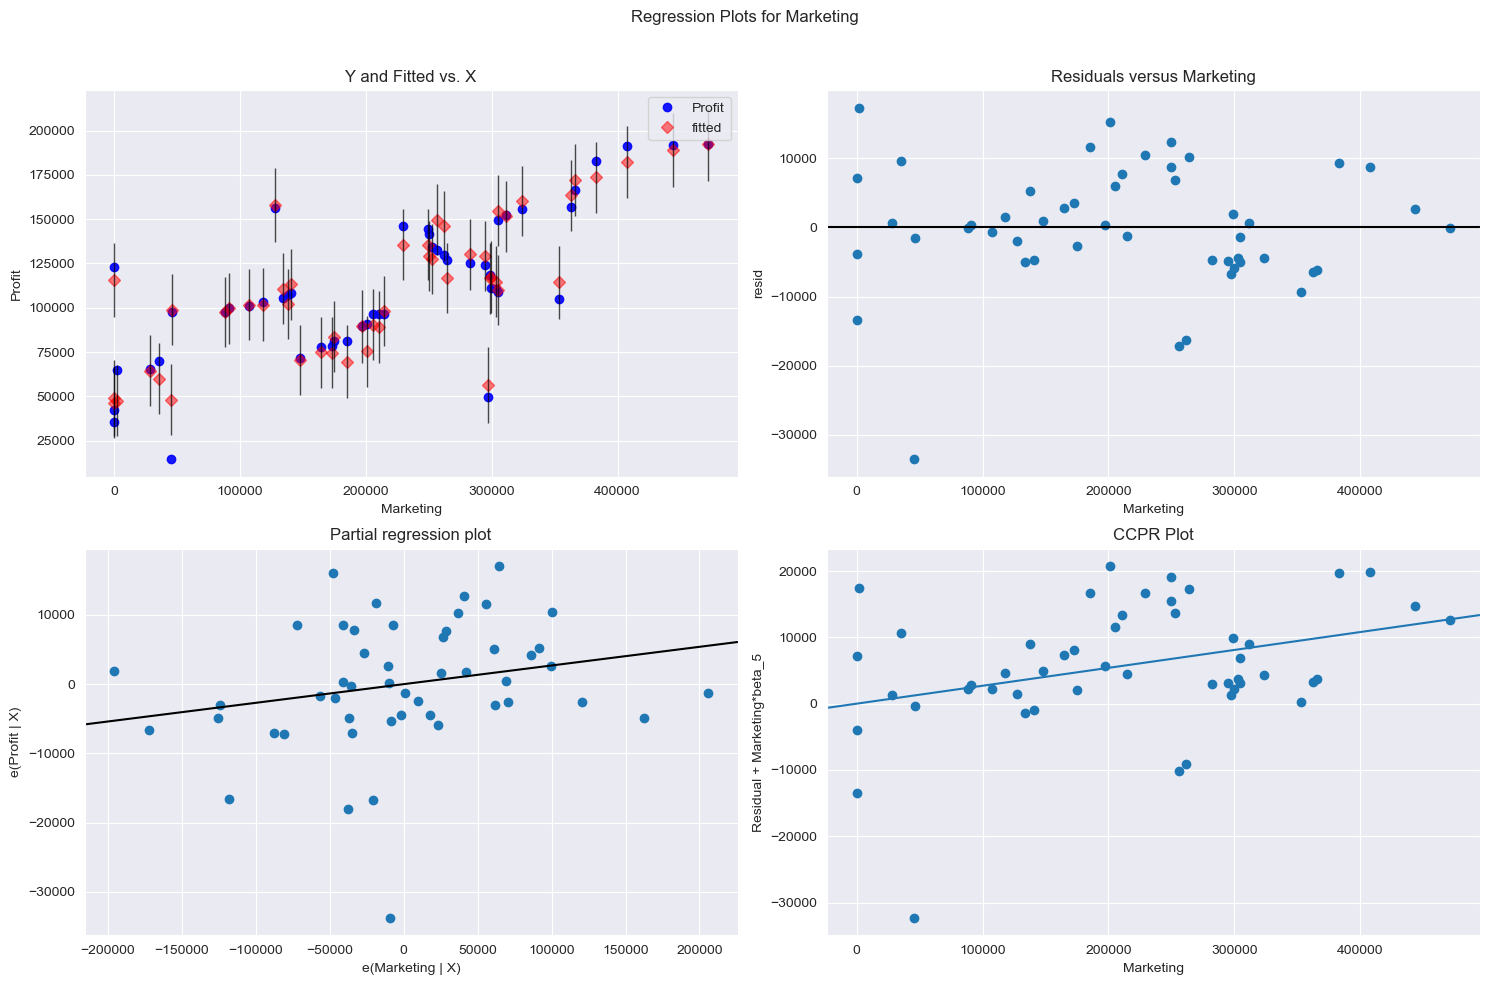

In [26]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, 'Marketing', fig=fig)
plt.show()

In [28]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, 'State', fig=fig)
plt.show()

ValueError: 'State' is not in list

<Figure size 1500x1000 with 0 Axes>

In [30]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

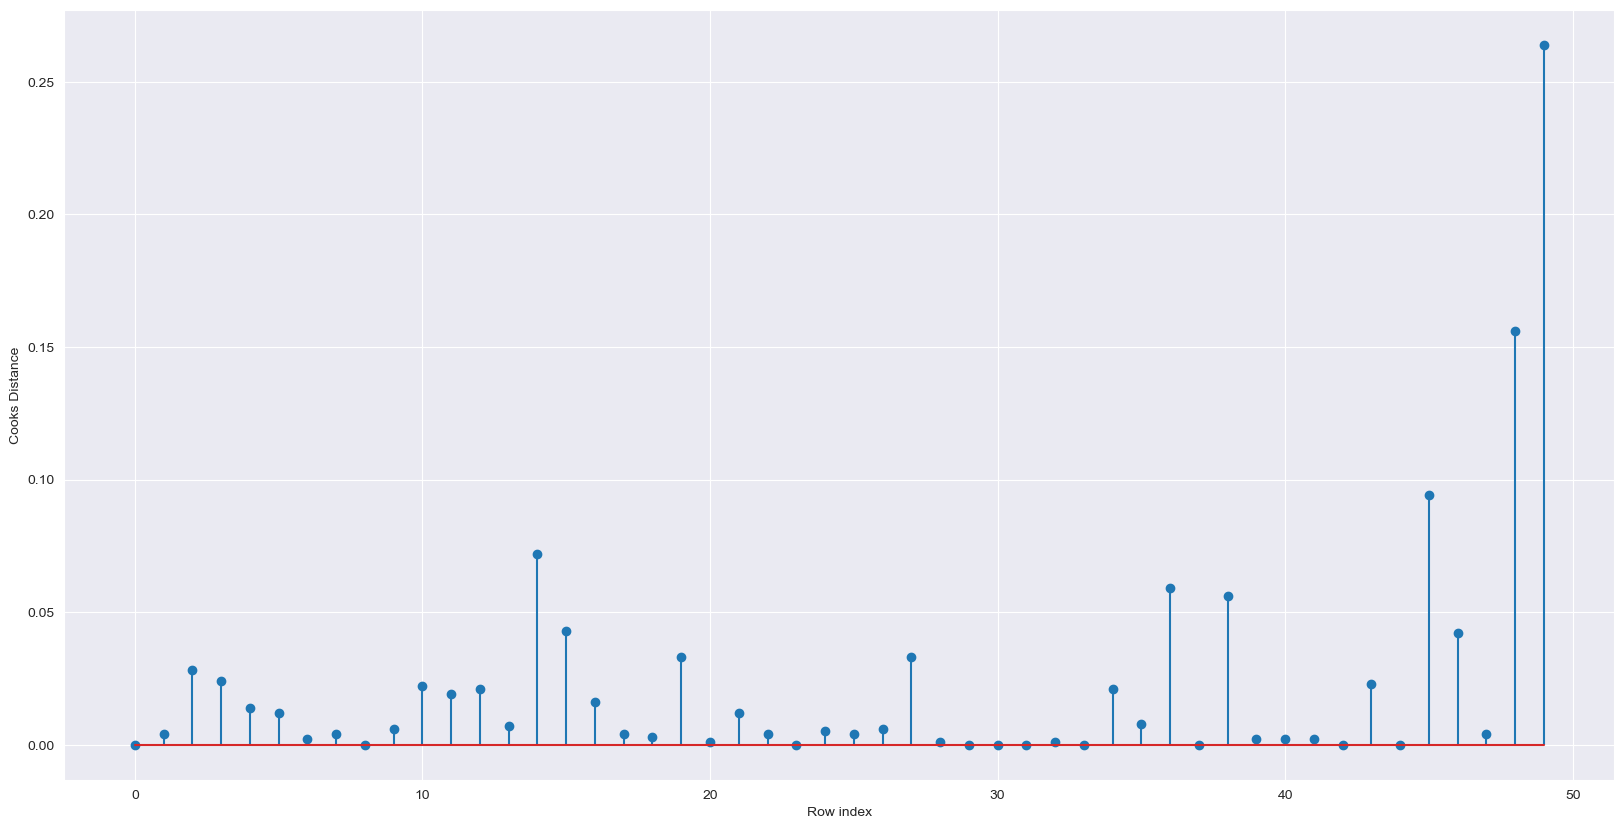

In [32]:
fig = plt.subplots(figsize=(20,10))
plt.stem(np.arange(len(startups)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [33]:
(np.argmax(c),np.max(c))

(49, 0.2639594358692202)

In [34]:
startups.shape

(50, 5)

In [36]:
k = startups.shape[1]
n = startups.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.36

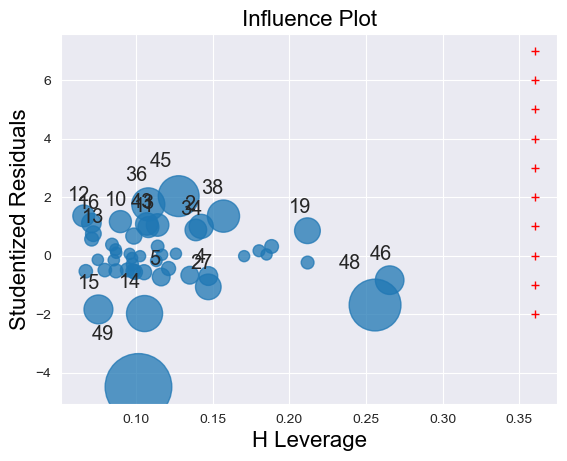

In [38]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,alpha=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

In [39]:
startups[startups.index.isin([49])]

,Spend,Administration,Marketing,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [40]:
#improving the model

In [41]:
df = startups.copy()
df

,Spend,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [42]:
df1=df.drop(df.index[[49]],axis=0).reset_index()
df1

,index,Spend,Administration,Marketing,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [43]:
while np.max(c)>0.5 :
    model=smf.ols('Profit~Spend+Administration+Marketing+State',data=df1).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    df1=df1.drop(df1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    df1
else:
    final_model=smf.ols('Profit~Spend+Administration+Marketing+State',data=df1).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9618082858227786


In [44]:
df1

,index,Spend,Administration,Marketing,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [46]:
pred_y = final_model.predict(df1)
pred_y

0     190158.286186
1     188917.339413
2     180356.022379
3     171835.121622
4     170611.039177
5     161933.895088
6     158918.600299
7     159073.187404
8     150652.118920
9     155504.737225
10    135154.667794
11    136691.955053
12    129012.886836
13    129003.663840
14    148977.165563
15    145223.746646
16    118657.325455
17    129698.996135
18    128809.413614
19    115762.021211
20    118335.175808
21    117203.470112
22    114924.439923
23    110273.368723
24    113239.472233
25    104538.867178
26    111129.014561
27    114231.691139
28    102600.701014
29    102229.270972
30    100199.636827
31     98246.061777
32    101409.986650
33     98572.020995
34     91728.442640
35     90915.064149
36     76670.864919
37     91870.126205
38     70608.331246
39     86284.488239
40     77761.930431
41     76052.890197
42     73607.243231
43     61687.603280
44     68079.899187
45     49523.991274
46     57967.070072
47     50396.799144
48     50710.448014
dtype: float64